# Overview

The consumption of online news is expediting day by day due to the extensive adoption of smartphones and the rise of social networks. Online news content includes various key properties like it is easily produced, it is small in size, its lifespan is short and the cost is low. Such qualities make news content more effective to be consumed on social sharing platforms. More interestingly, such content can capture the eye of a signiﬁcant amount of internet users within a brief period of time. As a result, the main target on the analysis of online news content, like predicting the recognition of story articles and demonstrating their decay of interest over time, has significantly increased since it has so many practical meanings.

# Importing important libraries

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os
import missingno as msno

#Sklearn
import imblearn
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import linear_model, metrics

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image

#Others
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting the number of rows and columns visible...
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.width', 10000)

# Read Data

In [3]:
data = pd.read_csv(r'C:\Users\Nikhil Bhati\Downloads\ml-lab-ii-c33\train.csv')
unseen = pd.read_csv(r'C:\Users\Nikhil Bhati\Downloads\ml-lab-ii-c33\test.csv')
sample= pd.read_csv(r'C:\Users\Nikhil Bhati\Downloads\ml-lab-ii-c33\sample.csv')
dd= pd.read_csv(r'C:\Users\Nikhil Bhati\Downloads\ml-lab-ii-c33\data_dictionary.csv')

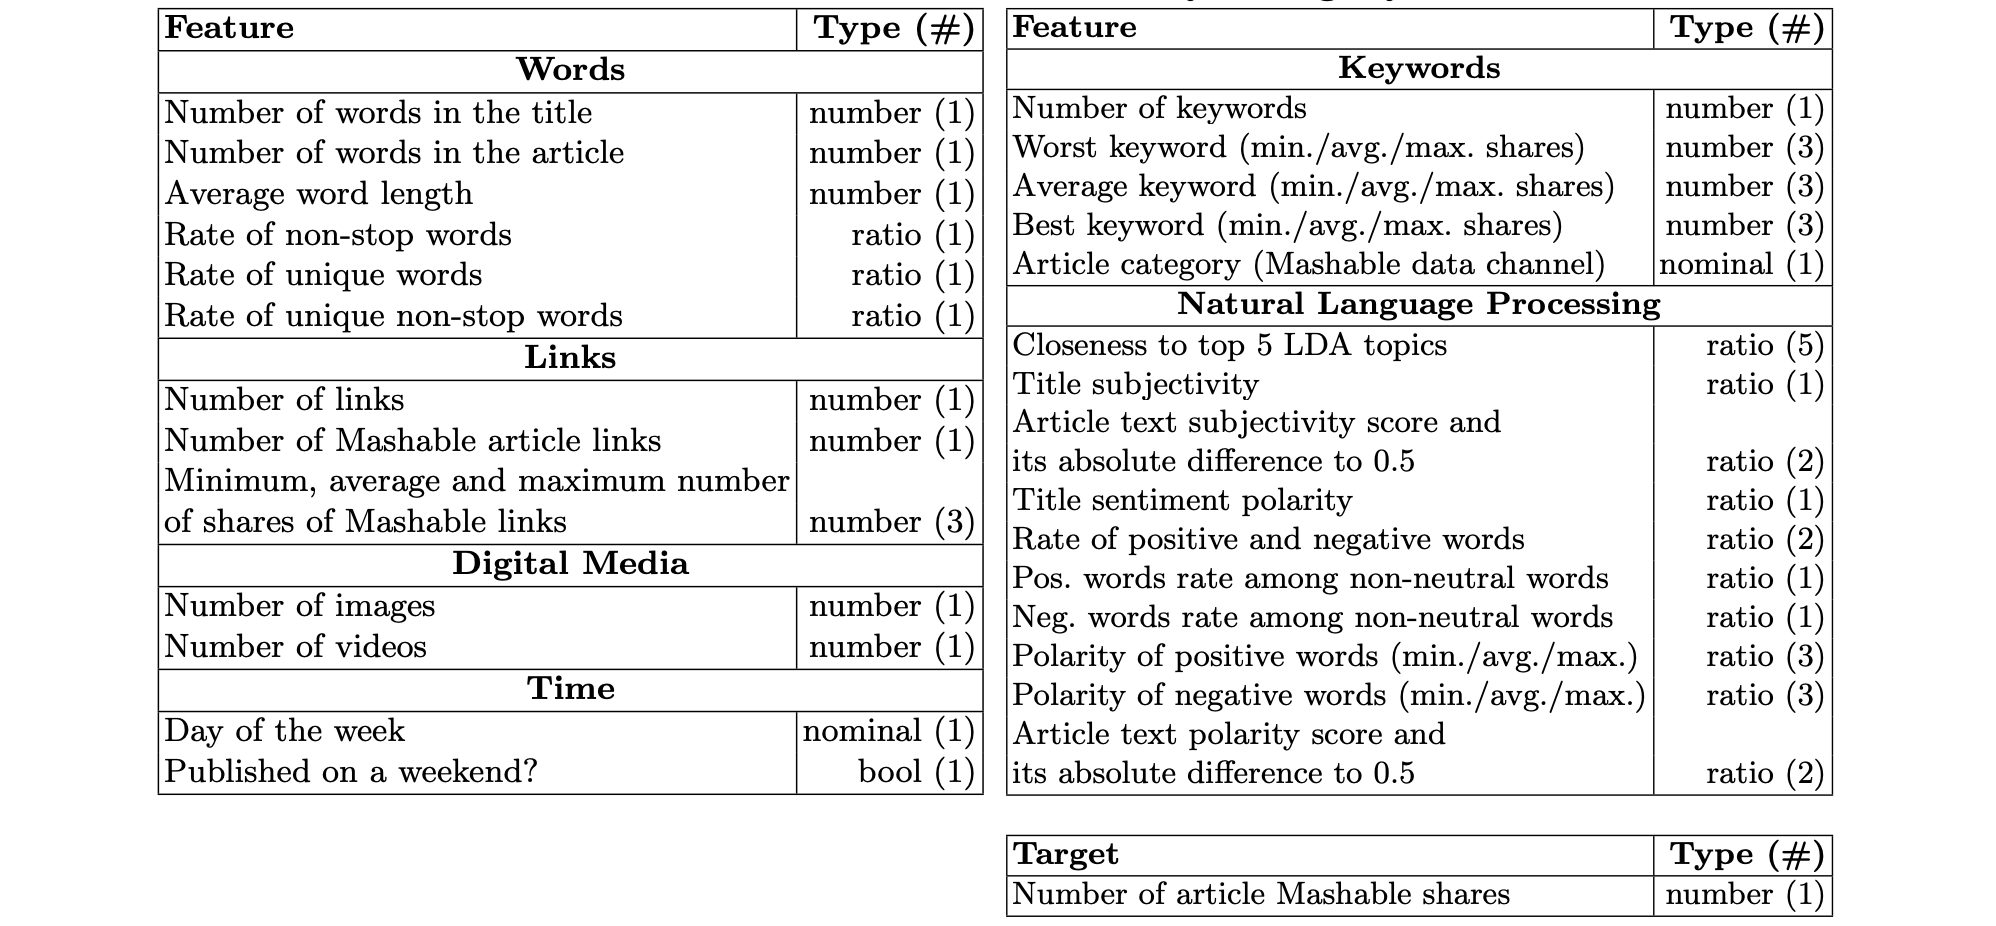

In [4]:
Image(filename=r'C:\Users\Nikhil Bhati\Downloads\ml-lab-ii-c33\features.png')

In [5]:
# Let's check the shape of each of the dataframe...
print(data.shape)
print(unseen.shape)
print(sample.shape)
print(dd.shape)

(29733, 61)
(9911, 60)
(9911, 2)
(61, 3)


In [6]:
# Let's read data dictionary to know the meaning of the columns...
dd

,Unnamed: 0,column,description
0,0,url,URL of the article (non-predictive)
1,1,timedelta,Days between the article publication and the d...
2,2,ntokenstitle,Number of words in the title
3,3,ntokenscontent,Number of words in the content
4,4,nuniquetokens,Rate of unique words in the content
5,5,nnonstop_words,Rate of non-stop words in the content
6,6,nnonstopuniquetokens,Rate of unique non-stop words in the content
7,7,num_hrefs,Number of links
8,8,numselfhrefs,Number of links to other articles published by...
9,9,num_imgs,Number of images


In [7]:
# Let's read the sample data...
sample.head(10)

,id,shares
0,29733,20000
1,29734,20000
2,29735,20000
3,29736,20000
4,29737,20000
5,29738,20000
6,29739,20000
7,29740,20000
8,29741,20000
9,29742,20000


In [8]:
# Let's read the train.csv data...
data.head(10)

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.250000,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,2,http://mashable.com/2014/06/20/non-player-char...,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551
5,5,http://mashable.com/2013/09/09/apple-iphone-ev...,11.0,175.0,0.705202,1.0,0.785714,8.0,3.0,1.0,1.0,4.834286,9.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,506.0,119.714286,0.0,843300.0,247744.444444,0.000000,8709.769231,3172.079106,4200.0,13300.0,9166.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022436,0.022608,0.022413,0.686423,0.246121,0.566667,0.061905,0.022857,0.017143,0.571429,0.428571,0.325000,0.100000,0.6,-0.422222,-0.6000,-0.166667,0.000000,0.000000,0.500000,0.000000,1000
6,6,http://mashable.com/2013/05/03/dabkick/,10.0,373.0,0.500000,1.0,0.663462,4.0,1.0,NaN,0.0,4.439678,6.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,NaN,264.400000,0.

In [9]:
# Let's read the test.csv data...
unseen.head(10)

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,29733,http://mashable.com/2014/12/05/2014-cant-unsee/,10.0,564.0,0.505618,1.0,0.637394,21.0,1.0,0.0,3.0,4.723404,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,442.0,128.000000,23700.0,843300.0,340780.000000,2154.061235,3702.951220,2994.958581,2300.0,2300.0,2300.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040069,0.839887,0.040038,0.040006,0.442277,0.053681,0.037234,0.019504,0.656250,0.343750,0.269218,0.062500,0.6,-0.263636,-0.700000,-0.100000,1.000000,0.000000,0.500000,0.000000
1,29734,http://mashable.com/2014/01/02/twitter-new-yea...,12.0,1127.0,0.431298,1.0,0.621622,10.0,6.0,11.0,0.0,4.360248,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,733.0,254.875000,6300.0,843300.0,140325.000000,1671.078652,4040.166667,2704.175559,3500.0,6300.0,4900.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025053,0.025040,0.025003,0.025000,0.899904,0.425115,0.159958,0.042591,0.014197,0.750000,0.250000,0.420924,0.033333,1.0,-0.243341,-0.714286,NaN,0.000000,0.000000,0.500000,0.000000
2,29735,http://mashable.com/2014/06/11/gopro-value-3-b...,10.0,400.0,0.564232,1.0,0.698795,1.0,0.0,1.0,1.0,4.765000,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,784.0,283.285714,6800.0,843300.0,166071.428571,1828.500000,3575.518291,2645.535689,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.885666,0.028572,0.028620,0.028572,0.548466,0.011693,0.047500,0.032500,0.593750,0.406250,0.312286,0.136364,0.5,-0.354808,-0.800000,-0.150000,0.000000,0.000000,0.500000,0.000000
3,29736,http://mashable.com/2014/10/08/spanish-ebola-d...,12.0,798.0,0.435279,1.0,0.613054,2.0,2.0,3.0,1.0,3.984962,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,796.0,284.222222,1800.0,843300.0,325322.222222,1059.333333,7735.494465,3966.507513,6300.0,6300.0,6300.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022223,0.495422,0.022223,0.437909,0.022223,0.537687,0.028463,0.047619,0.033835,NaN,0.415385,0.359650,0.136364,1.0,-0.362912,-1.000000,-0.050000,0.000000,0.000000,0.500000,0.000000
4,29737,http://mashable.com/2014/02/09/jennifer-lawren...,11.0,1010.0,0.464503,1.0,0.611727,32.0,2.0,1.0,0.0,5.180198,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,269.0,91.714286,0.0,843300.0,214137.500000,0.000000,3583.632001,2030.692327,1500.0,NaN,1500.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.025536,0.025047,0.899314,0.025101,0.025002,0.412513,0.104127,0.025743,0.013861,0.650000,0.350000,0.375991,0.100000,0.8,-0.264286,-0.500000,NaN,0.000000,0.000000,0.500000,0.000000
5,29738,http://mashable.com/2014/12/08/sony-hack-unpre...,14.0,1162.0,0.472537,1.0,0.674855,16.0,4.0,6.0,1.0,4.961274,10.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,330.0,81.750000,0.0,843300.0,252033.000000,-1.000000,3399.331393,1428.590860,815.0,1100.0,912.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.020002,0.020002,0.823685,0.020001,0.116310,0.355553,0.078954,0.023236,0.016351,0.586957,0.413043,0.438340,0.100000,1.0,-0.311550,-1.000000,-0.100000,0.000000,0.000000,0.500000,NaN
6,29739,http://mashable.com/2014/03/24/march-snowstorm...,10.0,1091.0,0.474690,1.0,0.663043,24.0,3.0,2.0,2.0,4.786434,8.0,0.0,0.0,0.0,

# Analysing the data

In [10]:
data.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,28921.000000,25200.000000,24326.000000,29146.000000,29733.000000,29269.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,28649.000000,29277.000000,29649.000000,29596.000000,28218.000000,29616.000000,29428.000000,29052.000000,28760.000000,29449.000000,27971.000000,29409.000000,28752.000000,28980.000000,28179.000000,29434.000000,28867.000000,29642.000000,28237.000000,27565.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,27487.000000,29382.000000,28898.000000,28845.000000,29146.000000,29140.000000,28495.000000,29288.000000,29584.000000,29546.000000,28951.000000,29021.000000,29605.000000,29466.000000,28934.000000,28276.000000,29733.000000
mean,14866.000000,10.403861,545.376652,0.554071,1.004238,0.694586,10.866706,3.285397,4.512785,1.263364,4.542961,7.217978,0.052669,0.175327,0.158275,0.058386,0.185047,0.213870,25.835945,1154.769238,311.128475,13653.678571,753460.486214,259904.903376,1121.525349,5658.801071,3141.089645,3949.202204,10461.340237,6426.079278,0.167884,0.186784,0.187516,0.184073,0.142966,0.061905,0.068102,0.129766,0.185391,0.140411,0.217210,0.223688,0.233266,0.443130,0.118950,0.039554,0.016590,0.681376,0.287926,0.353170,0.095636,0.755106,-0.259057,-0.521207,-0.106996,0.282072,0.071137,0.342417,0.155628,3439.840581
std,8583.322113,2.122101,471.476136,4.064623,6.039790,3.768884,11.384882,3.851624,8.335517,4.158469,0.855936,1.912259,0.223375,0.380253,0.365005,0.234476,0.388342,0.410043,69.316700,4008.595967,623.943555,57864.532067,213165.450292,135215.399335,1136.661797,6094.277266,1323.734009,18771.379524,41548.116050,23705.054711,0.373770,0.389745,0.390332,0.387550,0.350044,0.240988,0.251926,0.336052,0.264106,0.218503,0.283237,0.295239,0.288963,0.117417,0.096957,0.017454,0.010783,0.191247,0.156156,0.105223,0.071699,0.248494,0.128085,0.291191,0.095238,0.324263,0.265052,0.188547,0.226089,12212.123341
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,7433.000000,9.000000,245.000000,0.471376,1.000000,0.626598,4.000000,1.000000,1.000000,0.000000,4.477124,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,444.000000,141.000000,0.000000,843300.000000,173296.428572,0.000000,3562.101631,2386.456742,636.000000,1100.000000,980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025060,0.025013,0.028571,0.028571,0.0285

In [11]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

# Data Cleaning

In [12]:
# Checking if there are columns with one unique value since it won't affect our analysis
data.nunique(dropna=True)

id                               29733
url                              29733
n_tokens_title                      20
n_tokens_content                  2250
n_unique_tokens                  21820
n_non_stop_words                  1404
n_non_stop_unique_tokens         18703
num_hrefs                          124
num_self_hrefs                      55
num_imgs                            86
num_videos                          52
average_token_length             23555
num_keywords                        10
data_channel_is_lifestyle            2
data_channel_is_entertainment        2
data_channel_is_bus                  2
data_channel_is_socmed               2
data_channel_is_tech                 2
data_channel_is_world                2
kw_min_min                          23
kw_max_min                        1038
kw_avg_min                       14367
kw_min_max                         957
kw_max_max                          30
kw_avg_max                       24057
kw_min_avg               

In [13]:
# We will be dropping the columns which won't come handy in our further analysis...
data.drop(['url','average_token_length','n_tokens_title',
                'n_tokens_content','n_unique_tokens','n_non_stop_words',
                'n_non_stop_unique_tokens','is_weekend'],1,inplace=True)

In [14]:
# We will turn ID into the index as it won't come handy in our further analysis...
data.set_index('id', inplace = True)

In [15]:
data.shape

(29733, 52)

In [16]:
data.head()

,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.0,3.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,22.0,7.0,1.0,16.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,9.0,4.0,1.0,1.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,7.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,10.0,4.0,14.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551


In [17]:
# We will be dropping the column, numberof keywords in meta data...
data.drop(['num_keywords'],1,inplace=True)

Now let's have a look at the missing values. 

# Missing Values

<AxesSubplot:>

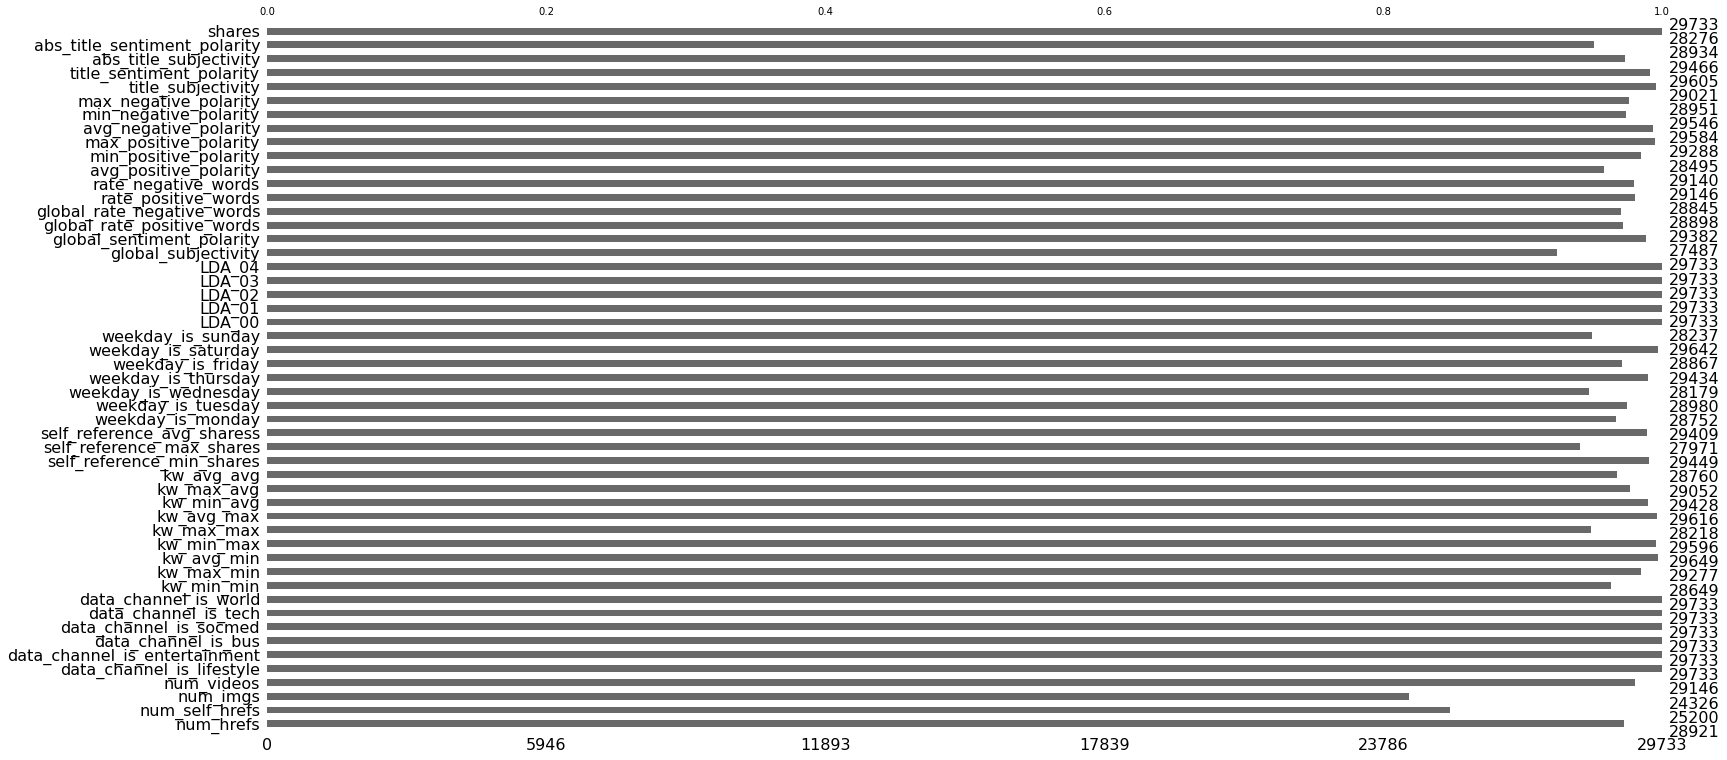

In [18]:
msno.bar(data)

In [19]:
# getting missing %
round(data.isnull().mean()*100,2)

num_hrefs                         2.73
num_self_hrefs                   15.25
num_imgs                         18.19
num_videos                        1.97
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.65
kw_max_min                        1.53
kw_avg_min                        0.28
kw_min_max                        0.46
kw_max_max                        5.10
kw_avg_max                        0.39
kw_min_avg                        1.03
kw_max_avg                        2.29
kw_avg_avg                        3.27
self_reference_min_shares         0.96
self_reference_max_shares         5.93
self_reference_avg_sharess        1.09
weekday_is_monday                 3.30
weekday_is_tuesday                2.53
weekday_is_wednesday              5.23
weekday_is_thursday      

In [20]:
# getting actual missing numbers... 
data.isnull().sum()

num_hrefs                         812
num_self_hrefs                   4533
num_imgs                         5407
num_videos                        587
data_channel_is_lifestyle           0
data_channel_is_entertainment       0
data_channel_is_bus                 0
data_channel_is_socmed              0
data_channel_is_tech                0
data_channel_is_world               0
kw_min_min                       1084
kw_max_min                        456
kw_avg_min                         84
kw_min_max                        137
kw_max_max                       1515
kw_avg_max                        117
kw_min_avg                        305
kw_max_avg                        681
kw_avg_avg                        973
self_reference_min_shares         284
self_reference_max_shares        1762
self_reference_avg_sharess        324
weekday_is_monday                 981
weekday_is_tuesday                753
weekday_is_wednesday             1554
weekday_is_thursday               299
weekday_is_f

As we can see the missing values numbers aren't that much. So we won't be dropping any columns, instead we will interpolate them to keep the purity of the data.

In [21]:
# Before interpolating we will be converting missing values in binary columns into 0
data['weekday_is_monday']= data['weekday_is_monday'].fillna(0)
data['weekday_is_tuesday']= data['weekday_is_tuesday'].fillna(0)
data['weekday_is_wednesday']= data['weekday_is_wednesday'].fillna(0)
data['weekday_is_thursday']= data['weekday_is_thursday'].fillna(0)
data['weekday_is_friday']= data['weekday_is_friday'].fillna(0)
data['weekday_is_saturday']= data['weekday_is_saturday'].fillna(0)
data['weekday_is_sunday']= data['weekday_is_sunday'].fillna(0)

In [22]:
# Re-checking the Missing Values...
data.isnull().sum()

num_hrefs                         812
num_self_hrefs                   4533
num_imgs                         5407
num_videos                        587
data_channel_is_lifestyle           0
data_channel_is_entertainment       0
data_channel_is_bus                 0
data_channel_is_socmed              0
data_channel_is_tech                0
data_channel_is_world               0
kw_min_min                       1084
kw_max_min                        456
kw_avg_min                         84
kw_min_max                        137
kw_max_max                       1515
kw_avg_max                        117
kw_min_avg                        305
kw_max_avg                        681
kw_avg_avg                        973
self_reference_min_shares         284
self_reference_max_shares        1762
self_reference_avg_sharess        324
weekday_is_monday                   0
weekday_is_tuesday                  0
weekday_is_wednesday                0
weekday_is_thursday                 0
weekday_is_f

We still have a missing value let's try to sort that out.

In [23]:
# Let's try by changing the direction...
data.interpolate(method = 'linear', limit_direction = 'forward', inplace = True)

In [24]:
# Re-checking the Missing Values...
data.isnull().sum()

num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_sharess       0
weekday_is_monday                0
weekday_is_tuesday               0
weekday_is_wednesday             0
weekday_is_thursday              0
weekday_is_friday                0
weekday_is_saturday              0
weekday_is_sunday   

In [25]:
# As we can see we still have missing values let's deal with them...
data.interpolate(method = 'linear', limit_direction = 'backward', inplace = True)

In [26]:
# Re-checking the Missing Values...
data.isnull().sum()

num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_sharess       0
weekday_is_monday                0
weekday_is_tuesday               0
weekday_is_wednesday             0
weekday_is_thursday              0
weekday_is_friday                0
weekday_is_saturday              0
weekday_is_sunday   

In [27]:
data.shape

(29733, 51)

We have dealt with the Null Values. Let's check the outliers.

# EDA

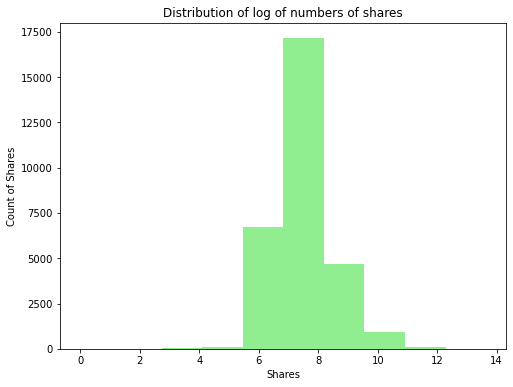

In [28]:
# choose features and target
X = data.iloc[:,:50] # select all columns except Shares
y = data["shares"].values.ravel() 
plt.figure(figsize= (8,6))
plt.hist(np.log(y),color="lightgreen")
plt.xlabel("Shares")
plt.ylabel("Count of Shares")
plt.title("Distribution of log of numbers of shares")
plt.show()

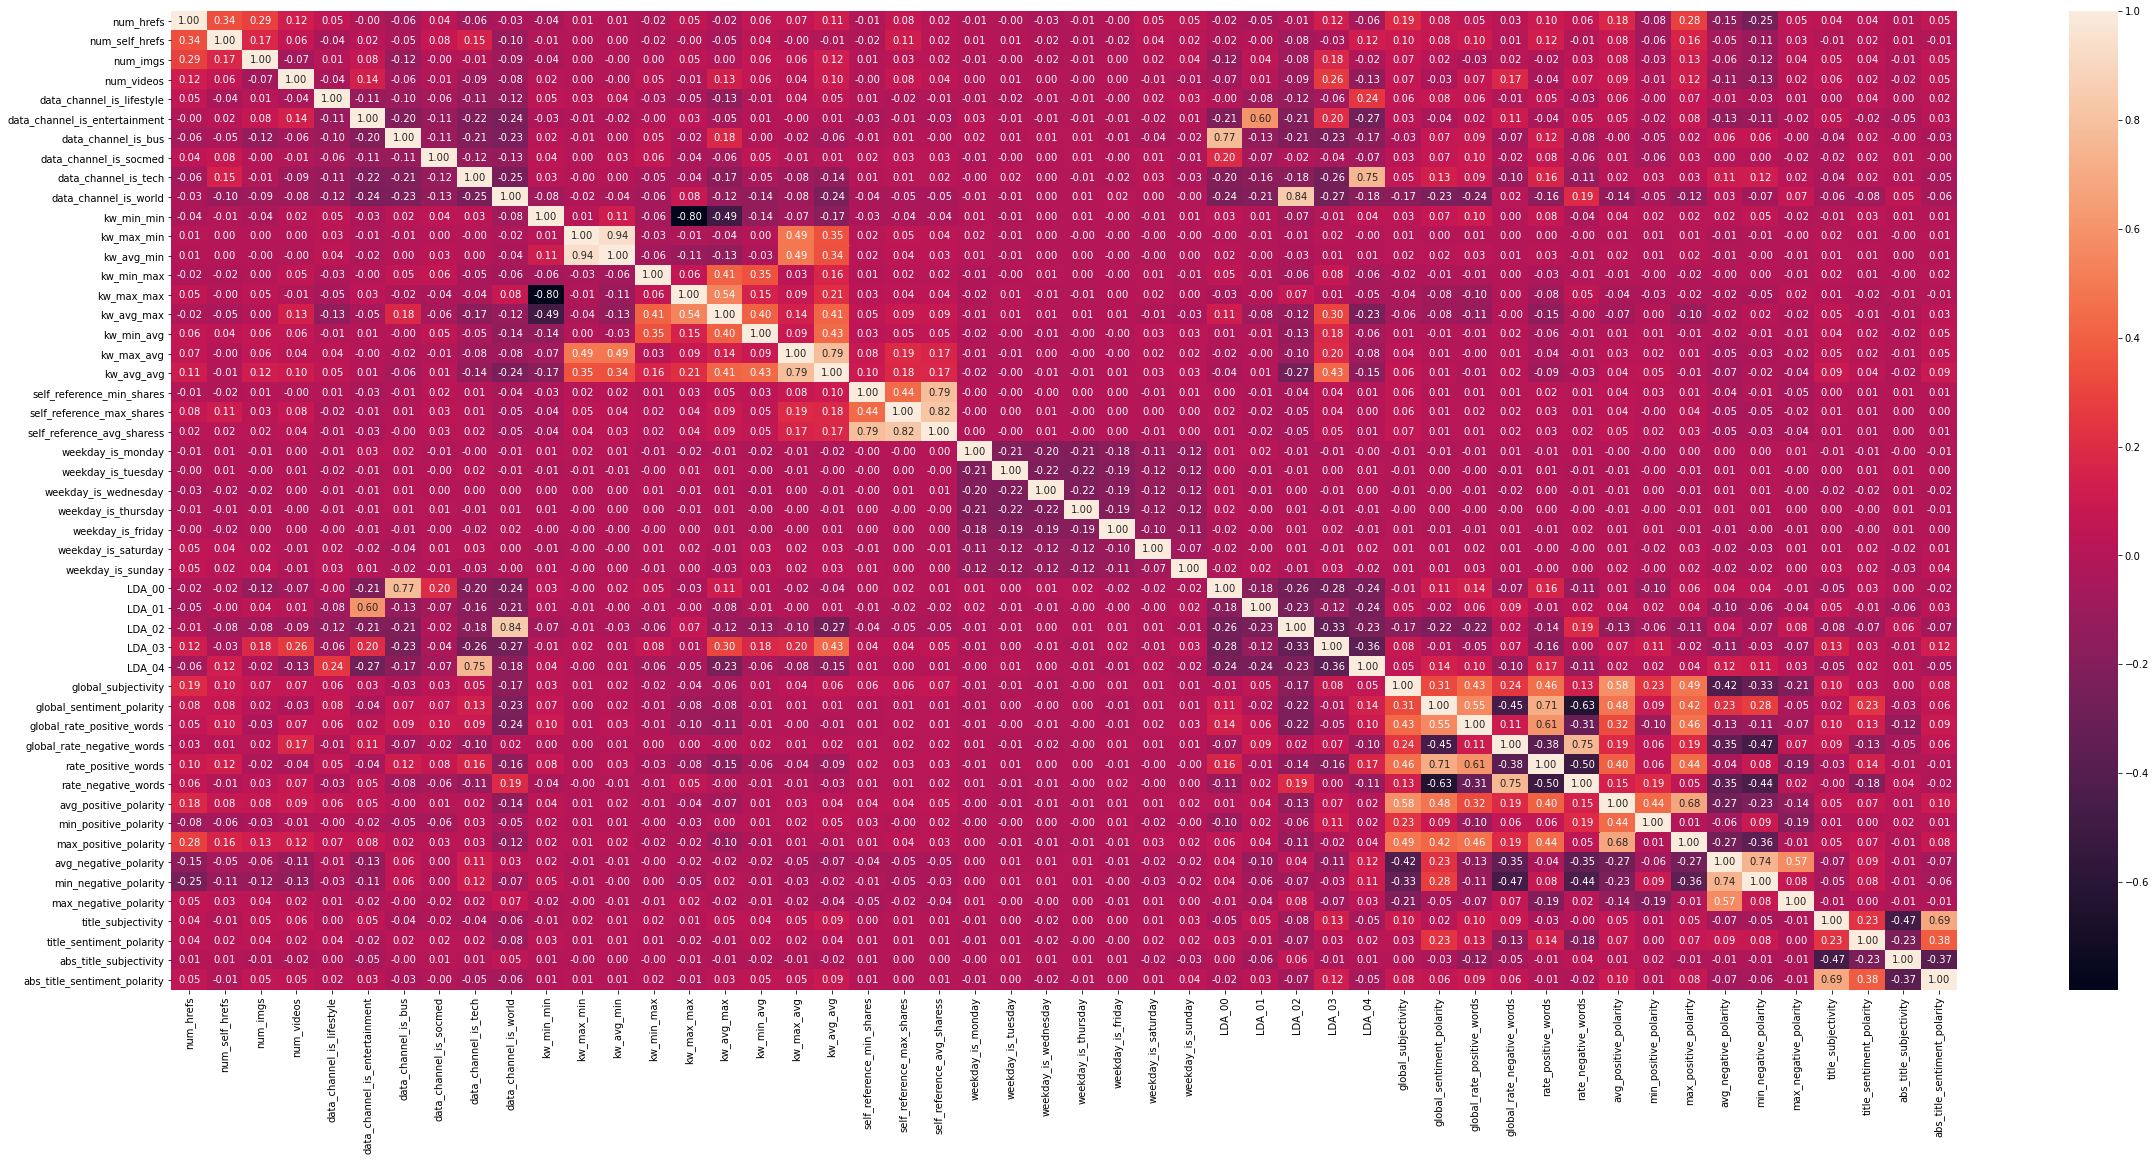

In [29]:
# plot the feature correlation heatmap
plt.figure(figsize=(40,18))
sns.heatmap(X.corr(),annot=True,fmt='.2f') 
plt.show()

Number of multicollinearity is few, so we don't need to drop any columns as we don't want to loose information.

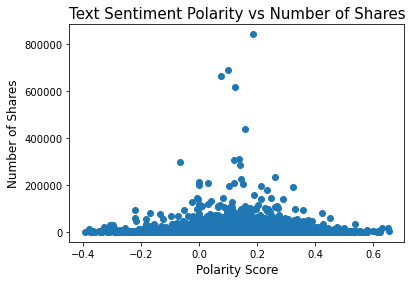

In [30]:
# text sentiment polarity vs number of shares
plt.scatter(data["global_sentiment_polarity"], data["shares"])
plt.title("Text Sentiment Polarity vs Number of Shares", size=15)
plt.xlabel("Polarity Score", size=12)
plt.ylabel("Number of Shares", size=12)
plt.show()

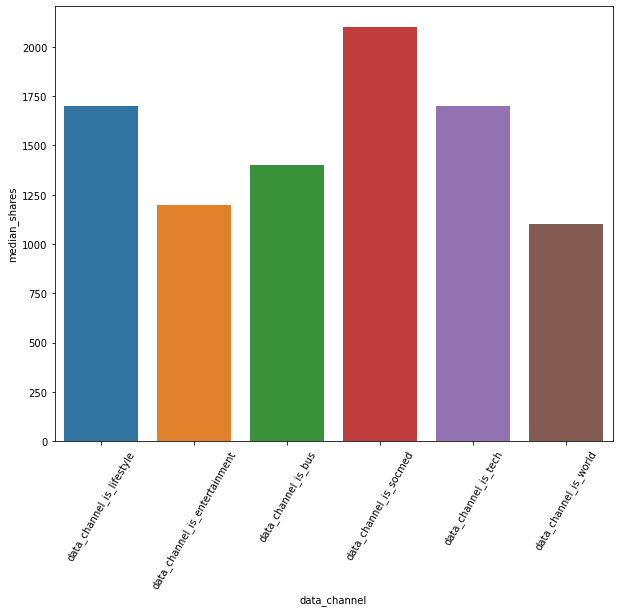

In [31]:
plt.figure(figsize= (10,8))
channel = []
cols = ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']
for d in cols:
    channel.append(data[data[d]==1]['shares'].median())

ax = sns.barplot(x = cols, y = channel)
ax.set(xlabel = 'data_channel', ylabel = 'median_shares')
plt.xticks(rotation = 60)
plt.show()

data_channel_is_socmed has the highest number of shares.

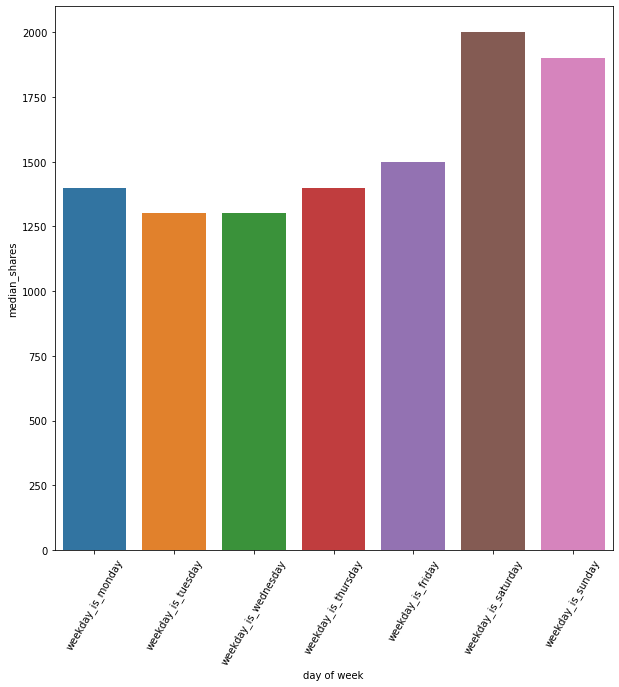

In [32]:
plt.figure(figsize= (10,10))
shares = []
cols = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday','weekday_is_thursday', 
        'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday']
for d in cols:
    shares.append(data[data[d] == 1]['shares'].median())

ax = sns.barplot(x = cols, y = shares)
ax.set(xlabel = 'day of week', ylabel = 'median_shares')
plt.xticks(rotation = 60)
plt.show()

From the graph we can see that on Saturday has got maximum number of shares.

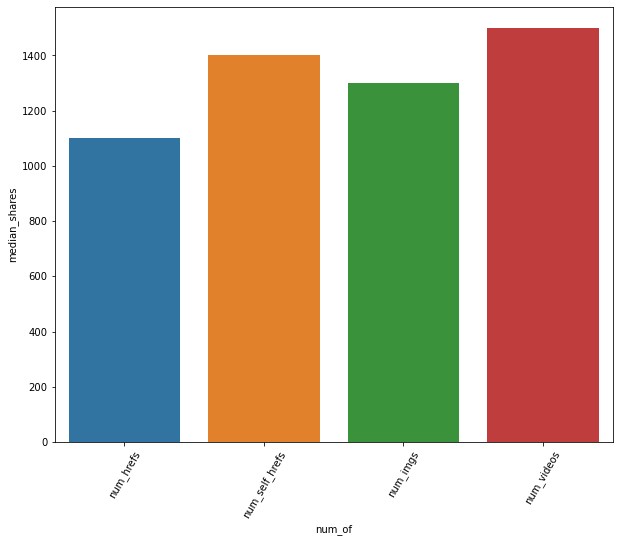

In [33]:
plt.figure(figsize= (10,8))
channel = []
cols = ['num_hrefs',
       'num_self_hrefs', 'num_imgs',
       'num_videos']
for i in cols:
    channel.append(data[data[i]==1]['shares'].median())

ax = sns.barplot(x = cols, y = channel)
ax.set(xlabel = 'num_of', ylabel = 'median_shares')
plt.xticks(rotation = 60)
plt.show()

Sites that involves video content has the highest number of share.

# Outliers Handling

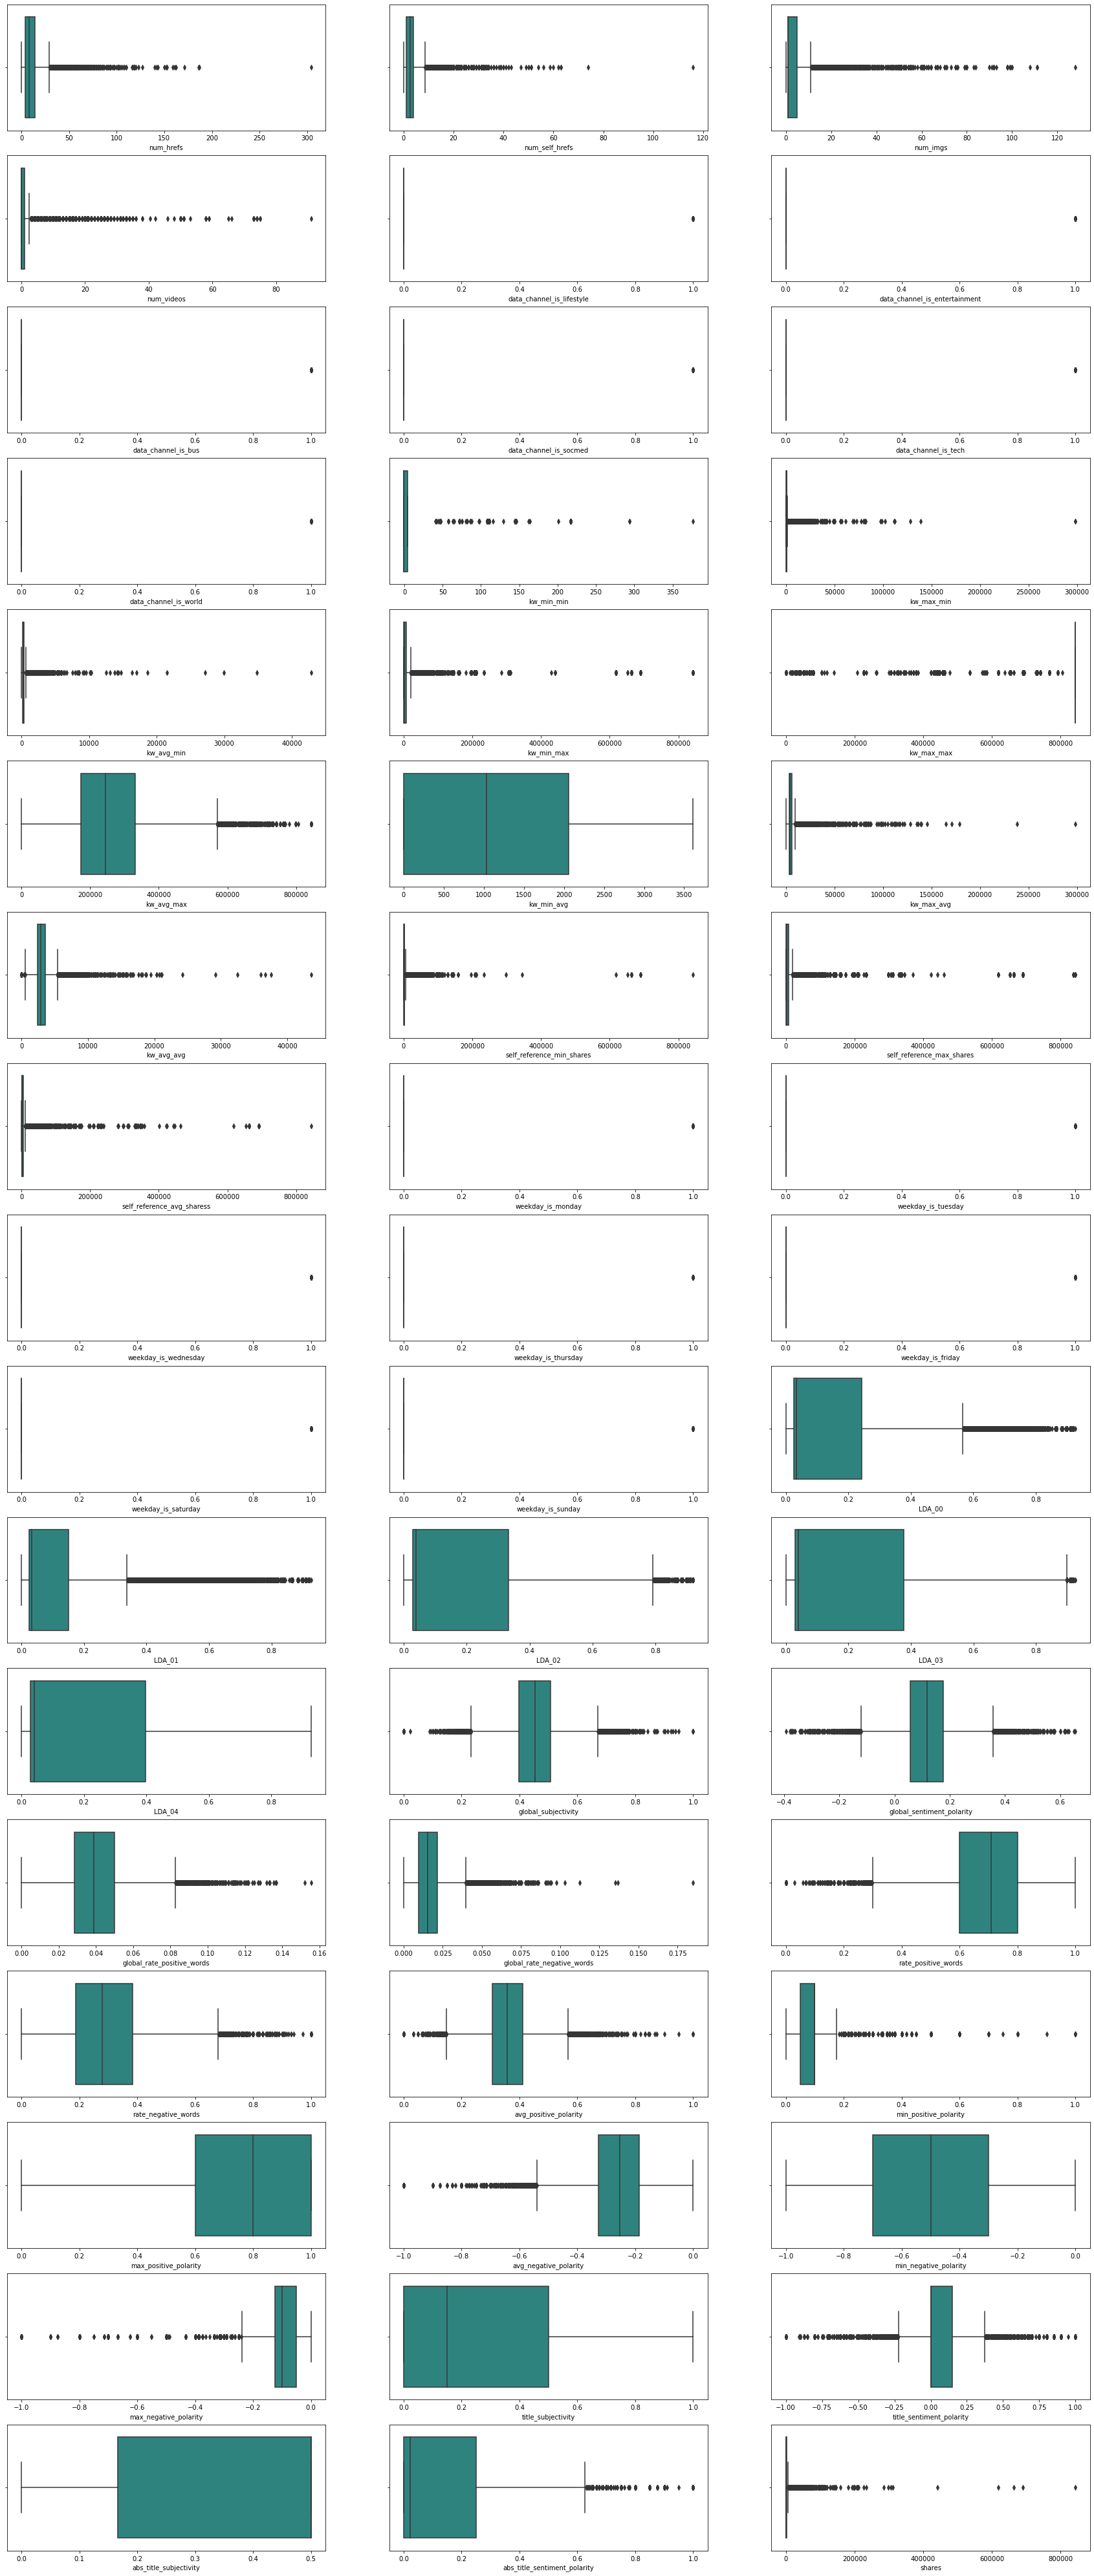

In [34]:
# plotting the data to check if there are outliers
plt.figure(figsize = (30,180))
feature = data.columns[:]
for i in enumerate(feature):
    plt.subplot(42,3, i[0]+1)
    sns.boxplot(data[i[1]],palette='viridis')

In [35]:
# columns for outlier handling (excluding shares and columns with only 0 or 1 values)
upper_cap_cols=['num_hrefs','num_self_hrefs','num_imgs',
               'num_videos','kw_min_min','kw_max_min',
               'kw_avg_min','kw_min_max','kw_max_max',
               'kw_avg_max','kw_max_avg','kw_avg_avg',
               'self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess',
               'LDA_00','LDA_01','LDA_02','LDA_03',
               'global_subjectivity','global_sentiment_polarity','global_rate_positive_words',
               'global_rate_negative_words','rate_positive_words','rate_negative_words',
               'avg_positive_polarity','min_positive_polarity','avg_negative_polarity','max_negative_polarity',
               'title_sentiment_polarity','abs_title_sentiment_polarity']

In [36]:
# Capping the data
for col in upper_cap_cols:
    upper_limit = data[col].mean() + (3*data[col].std())
    lower_limit = data[col].mean() - (3*data[col].std())
    # capping upper bound 
    data[col][data[col]<lower_limit] = lower_limit
    # capping Lower bound
    data[col][data[col]>upper_limit] = upper_limit

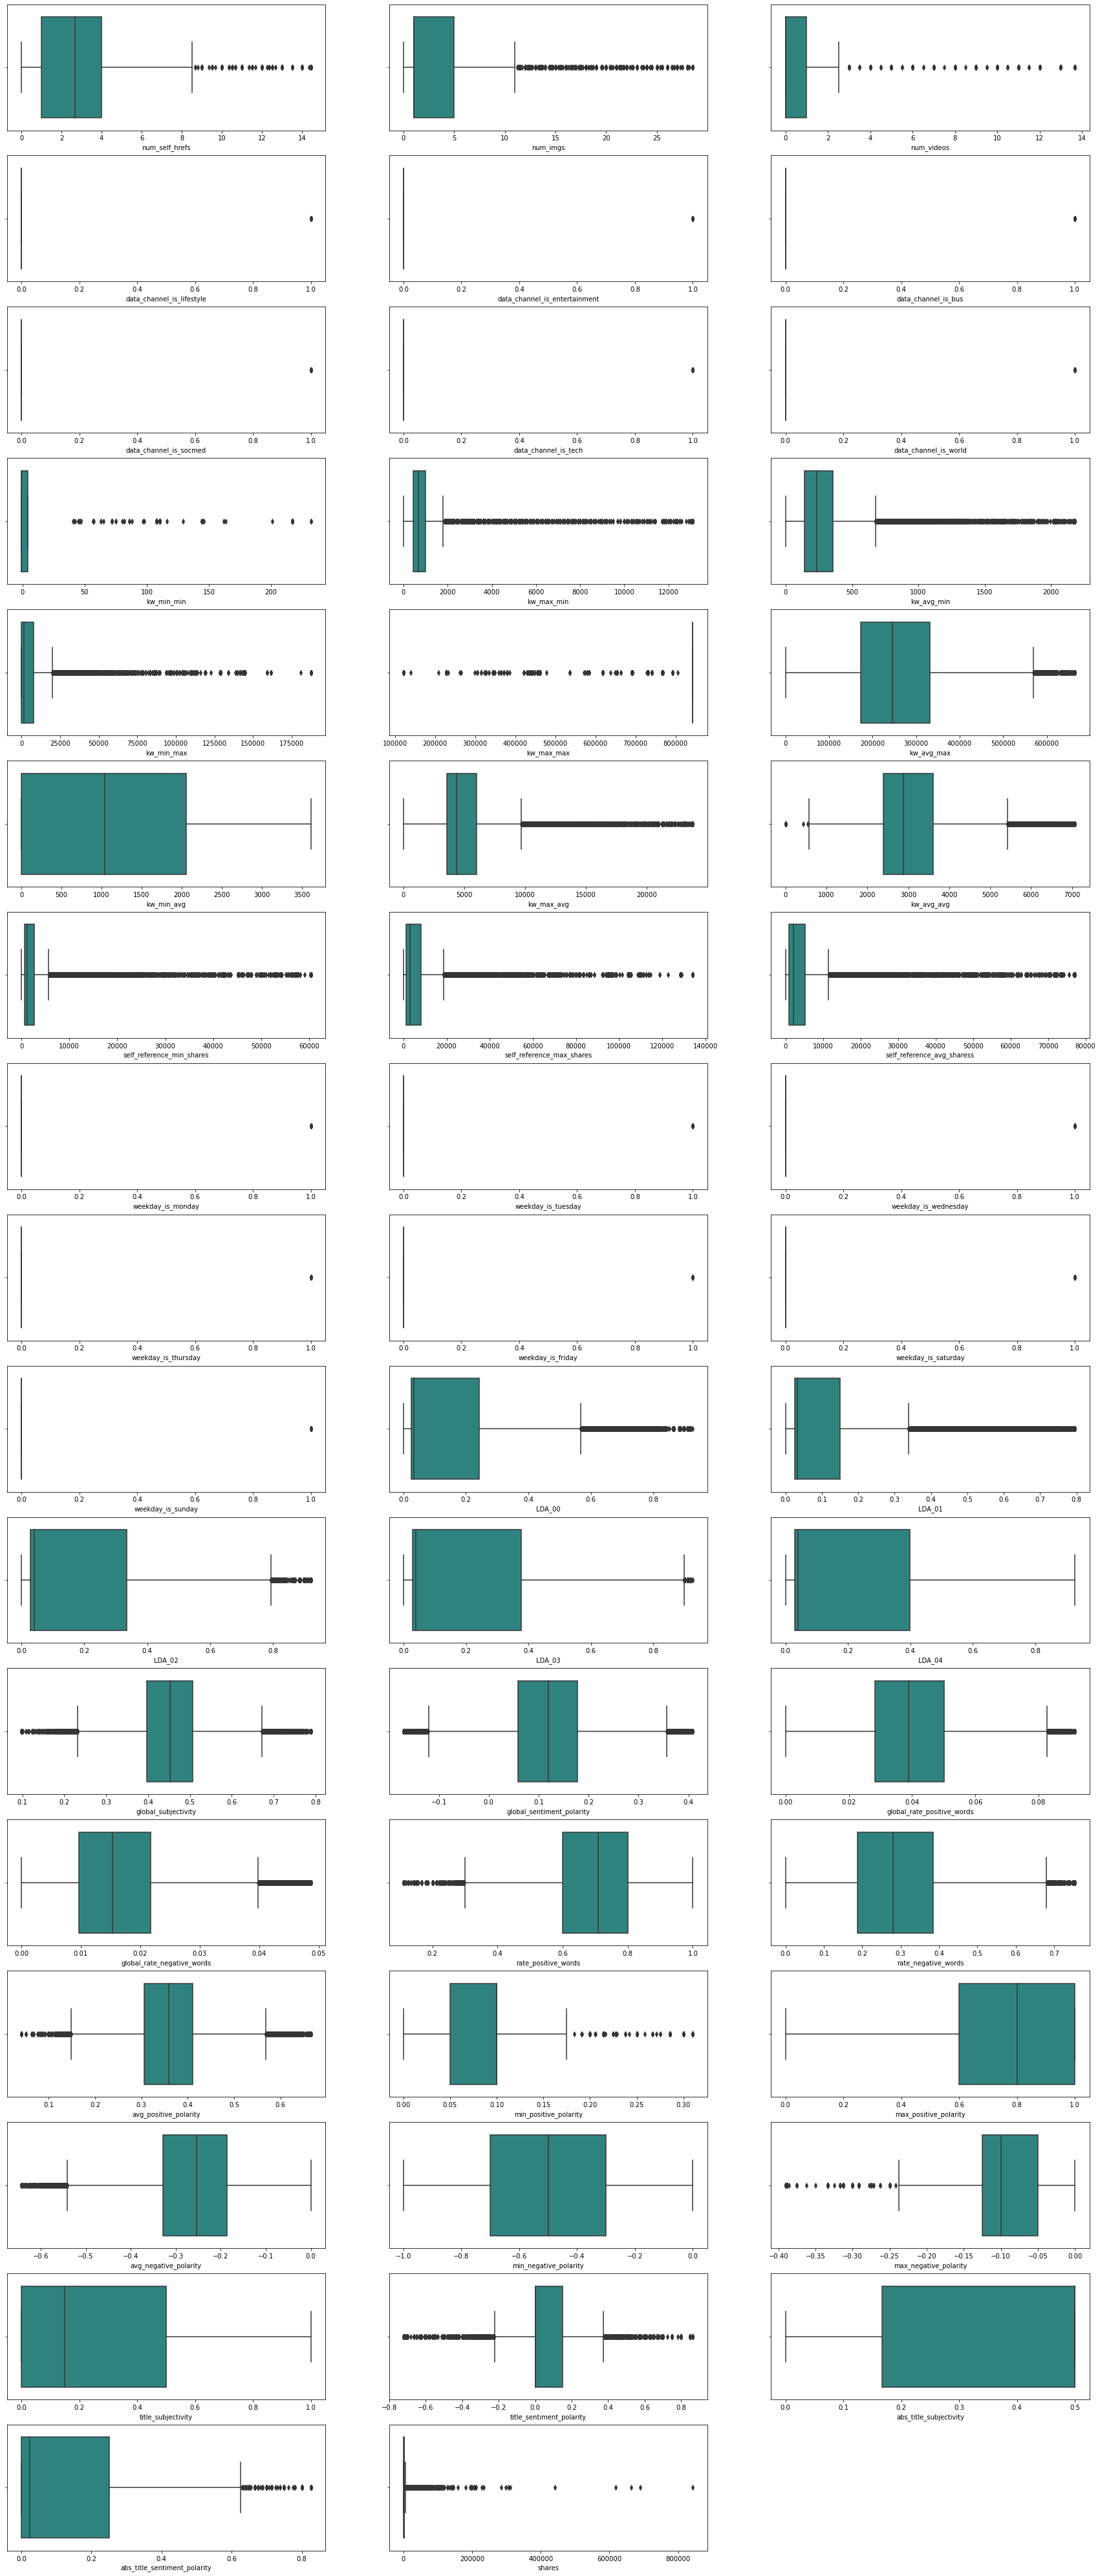

In [37]:
# plotting the data again to check if outliers are handled
plt.figure(figsize = (30,180))
feature = data.columns[1:]
for i in enumerate(feature):
    plt.subplot(42,3, i[0]+1)
    sns.boxplot(data[i[1]],palette='viridis')

So from the above plot we can see that outliers are handled and our data looks continuous now.

# Model Building

## Log Transform

In [38]:
X = data.drop(['shares'], axis=1) 
y = data["shares"]

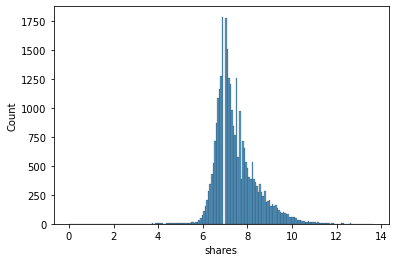

In [39]:
y = np.log(y)
sns.histplot(y)
#sns.histplot(np.log(y))
plt.show()

## Scaling

In [40]:
scaler = StandardScaler()

X[:] = scaler.fit_transform(X)

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20813, 50) (20813,)
(8920, 50) (8920,)


In [43]:
X_train.head()

,num_hrefs,num_self_hrefs,num_imgs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4585,-0.379130,0.306178,-0.503011,-0.391561,-0.23579,-0.461088,2.306102,-0.249011,-0.476513,-0.521588,-0.318897,-0.105763,-0.179169,-0.362428,-0.346179,-0.087373,-0.227170,-0.363432,-0.478858,-0.138330,-0.251508,-0.207771,-0.440237,2.119643,-0.464891,-0.472044,-0.401464,-0.256467,-0.262960,0.649239,1.092191,-0.649200,-0.644745,-0.087012,0.635403,0.869687,-0.917813,-0.448986,-0.102701,0.297929,1.808561,0.112531,0.986949,1.175523,1.369425,0.044572,-0.870932,-0.280330,0.841610,-0.718356
13413,-0.271029,-0.410816,-0.503011,-0.013093,-0.23579,-0.461088,2.306102,-0.249011,-0.476513,-0.521588,-0.391685,-0.417460,-0.706940,-0.394529,0.436686,0.426316,-0.989022,-0.621817,-1.126526,-0.338039,-0.446998,-0.442229,-0.440237,-0.471778,-0.464891,2.118447,-0.401464,-0.256467,-0.262960,1.722221,0.482357,-0.625665,-0.622177,-0.668836,-0.419545,0.403792,1.063043,-0.574201,0.892151,-0.856021,-0.226719,-1.005500,0.986949,0.067006,-1.653939,0.044572,-0.086316,-0.131984,-0.516563,-0.541859
9073,-0.703433,-0.410816,0.735526,-0.013093,-0.23579,2.168784,-0.433632,-0.249011,-0.476513,-0.521588,-0.391685,-0.114275,-0.294236,-0.320222,0.436686,0.608610,0.267945,0.633904,1.251556,0.373745,3.155447,2.795348,-0.440237,-0.471778,2.151043,-0.472044,-0.401464,-0.256467,-0.262960,-0.617823,0.372209,-0.688438,1.670214,-0.730362,0.754600,1.996314,1.547978,-1.626004,1.765679,-1.869246,0.667578,-0.166977,0.584053,2.084787,1.801335,1.347782,0.286698,1.895421,-1.162251,1.870272
28754,0.269477,1.023173,-0.503011,4.783330,-0.23579,2.168784,-0.433632,-0.249011,-0.476513,-0.521588,-0.318897,-0.340191,-0.510721,0.434001,0.436686,-0.364476,1.427571,-0.505077,0.188679,0.104906,-0.251508,-0.119032,-0.440237,-0.471778,-0.464891,2.118447,-0.401464,-0.256467,-0.262960,1.180571,-0.488731,-0.648894,0.600638,-0.691796,-0.089150,0.215816,0.425213,-0.599169,0.746563,-0.687150,-0.405526,-1.005500,-0.020290,0.036250,-0.444593,0.696177,0.532256,0.259112,-1.587313,-0.076548
21620,-0.595332,-0.052319,-0.503011,-0.391561,-0.23579,-0.461088,-0.433632,-0.249011,-0.476513,1.917221,2.781862,-0.018016,0.697696,-0.394529,-3.259392,-1.831028,-0.989022,-0.867219,-0.017370,-0.163934,-0.353208,-0.301180,-0.440237,-0.471778,-0.464891,-0.472044,-0.401464,-0.256467,3.802865,-0.124646,-0.516924,0.509723,0.693017,-0.708324,-1.073090,0.329968,-0.736432,-1.182643,0.964945,-0.940456,0.966852,0.112531,0.986949,-3.110455,-0.790120,-3.741159,-0.870932,-0.280330,0.841610,-0.718356


## Running Your First Training Model

In [44]:
import statsmodels.api as sm

In [45]:
# Logistic regression model
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 shares   No. Observations:                20813
Model:                            GLM   Df Residuals:                    20762
Model Family:                Binomial   Df Model:                           50
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:             6.0946e+06
Date:                Tue, 01 Feb 2022   Deviance:                   1.0360e+07
Time:                        15:43:55   Pearson chi2:                 4.02e+21
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          4.468e+16   4.65e+05    9.6e+10      0.000    4.47e+16    4.47e+16
num_hrefs                     -2.045e+14    5.7e+05  -3.59e+08      0.000   -2.04e+14   -2.04e+14
num_self_hrefs                 5.484e+13    5.3e+05   1.04e+08      0.000    5.48e+13    5.48e+13
num_imgs                        3.06e+14   5.21e+05   5.88e+08      0.000    3.06e+14    3.06e+14
num_videos                    -1.292e+15   5.14e+05  -2.52e+09      0.000   -1.29e+15   -1.29e+15
data_channel_is_lifestyle     -7.225e+14   7.01e+05  -1.03e+09      0.000   -7.23e+14   -7.23e+14
data_channel_is_entertainment -1.068e+15   7.71e+05  -1.38e+09      0.000   -1.07e+15   -1.07e+15
data_channel_is_bus           -2.927e+15   1.11e+06  -2.64e+09      0.000   -2.93e+15   -2.93e+15
data_channel_is_socmed        -6.258e+14   6.89e+05  -9.08e+08      0.000   -6.26e+14   -6.26e+14
data_channel_is_tech          -8.668e+14   1.15e+06  -7.54e+08      0.000   -8.67e+14   -8.67e+14
data_channel_is_world         -1.602e+15   1.23e+06   -1.3e+09      0.000    -1.6e+15    -1.6e+15
kw_min_min                     3.421e+14   7.95e+05   4.31e+08      0.000    3.42e+14    3.42e+14
kw_max_min                    -2.557e+13    1.3e+06  -1.97e+07      0.000   -2.56e+13   -2.56e+13
kw_avg_min                     1.777e+14   1.38e+06   1.29e+08      0.000    1.78e+14    1.78e+14
kw_min_max                    -1.456e+14   6.08e+05  -2.39e+08      0.000   -1.46e+14   -1.46e+14
kw_max_max                      1.59e+14   8.39e+05   1.89e+08      0.000    1.59e+14    1.59e+14
kw_avg_max                    -1.257e+14   8.33e+05  -1.51e+08      0.000   -1.26e+14   -1.26e+14
kw_min_avg                     8.772e+14   6.79e+05   1.29e+09      0.000    8.77e+14    8.77e+14
kw_max_avg                     1.419e+14   8.63e+05   1.64e+08      0.000    1.42e+14    1.42e+14
kw_avg_avg                    -2.393e+14   1.15e+06  -2.07e+08      0.000   -2.39e+14   -2.39e+14
self_reference_min_shares      2.329e+14   8.35e+05   2.79e+08      0.000    2.33e+14    2.33e+14
self_reference_max_shares       1.83e+14   1.01e+06   1.81e+08      0.000    1.83e+14    1.83e+14
self_reference_avg_sharess     4.929e+14   1.37e+06    3.6e+08      0.000    4.93e+14    4.93e+14
weekday_is_monday              -5.31e+14   1.08e+06  -4.91e+08      0.000   -5.31e+14   -5.31e+14
weekday_is_tuesday            -6.382e+13   1.12e+06  -5.69e+07      0.000   -6.38e+13   -6.38e+13
weekday_is_wednesday          -6.322e+13   1.11e+06  -5.69e+07      0.000   -6.32e+13   -6.32e+13
weekday_is_thursday            -5.53e+13   1.12e+06  -4.93e+07      0.000   -5.53e+13   -5.53e+13
weekday_is_friday              1.508e+14   1.03e+06   1.47e+08      0.000    1.51e+14    1.51e+14
weekday_is_saturday            4.116e+14    7

## Feature Selection using RFE

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

rfe = RFE(lr, n_features_to_select= 15)             #selected top 15 features
rfe = rfe.fit(X_train, Y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('num_hrefs', True, 1),
 ('num_self_hrefs', False, 36),
 ('num_imgs', False, 7),
 ('num_videos', False, 28),
 ('data_channel_is_lifestyle', False, 3),
 ('data_channel_is_entertainment', True, 1),
 ('data_channel_is_bus', True, 1),
 ('data_channel_is_socmed', False, 19),
 ('data_channel_is_tech', False, 20),
 ('data_channel_is_world', True, 1),
 ('kw_min_min', False, 4),
 ('kw_max_min', True, 1),
 ('kw_avg_min', True, 1),
 ('kw_min_max', False, 6),
 ('kw_max_max', False, 34),
 ('kw_avg_max', False, 15),
 ('kw_min_avg', False, 24),
 ('kw_max_avg', False, 5),
 ('kw_avg_avg', True, 1),
 ('self_reference_min_shares', False, 2),
 ('self_reference_max_shares', False, 22),
 ('self_reference_avg_sharess', True, 1),
 ('weekday_is_monday', False, 27),
 ('weekday_is_tuesday', False, 16),
 ('weekday_is_wednesday', False, 17),
 ('weekday_is_thursday', False, 18),
 ('weekday_is_friday', False, 23),
 ('weekday_is_saturday', True, 1),
 ('weekday_is_sunday', True, 1),
 ('LDA_00', True, 1),
 ('LDA_01', 

In [48]:
#The columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['num_hrefs', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_world', 'kw_max_min', 'kw_avg_min', 'kw_avg_avg', 'self_reference_avg_sharess', 'weekday_is_saturday', 'weekday_is_sunday', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'], dtype='object')

In [49]:
# will pass the above columns to X train and create a new df
X_train_rfe = X_train[col]
X_train_rfe.head()

,num_hrefs,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_world,kw_max_min,kw_avg_min,kw_avg_avg,self_reference_avg_sharess,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04
id,,,,,,,,,,,,,,,
4585,-0.379130,-0.461088,2.306102,-0.521588,-0.105763,-0.179169,-0.478858,-0.207771,-0.256467,-0.262960,0.649239,1.092191,-0.649200,-0.644745,-0.087012
13413,-0.271029,-0.461088,2.306102,-0.521588,-0.417460,-0.706940,-1.126526,-0.442229,-0.256467,-0.262960,1.722221,0.482357,-0.625665,-0.622177,-0.668836
9073,-0.703433,2.168784,-0.433632,-0.521588,-0.114275,-0.294236,1.251556,2.795348,-0.256467,-0.262960,-0.617823,0.372209,-0.688438,1.670214,-0.730362
28754,0.269477,2.168784,-0.433632,-0.521588,-0.340191,-0.510721,0.188679,-0.119032,-0.256467,-0.262960,1.180571,-0.488731,-0.648894,0.600638,-0.691796
21620,-0.595332,-0.461088,-0.433632,1.917221,-0.018016,0.697696,-0.017370,-0.301180,-0.256467,3.802865,-0.124646,-0.516924,0.509723,0.693017,-0.708324


In [50]:
# will pass the above columns to X test and create a new df
X_test_rfe = X_test[col]
X_test_rfe.head()

,num_hrefs,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_world,kw_max_min,kw_avg_min,kw_avg_avg,self_reference_avg_sharess,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04
id,,,,,,,,,,,,,,,
17455,0.269477,-0.461088,-0.433632,-0.521588,-0.533364,-0.660100,-0.122936,0.226584,-0.256467,-0.26296,1.102832,-0.496497,0.727084,-0.644216,-0.691897
25193,-0.379130,-0.461088,-0.433632,1.917221,-0.429902,-0.578539,-0.945489,-0.277828,-0.256467,-0.26296,-0.550436,-0.465012,1.500687,-0.622155,0.015371
13154,-0.162928,-0.461088,-0.433632,1.917221,-0.606705,-0.876031,-0.755866,-0.419927,-0.256467,-0.26296,-0.575752,-0.496693,2.293011,-0.644760,-0.691901
6712,-0.703433,-0.461088,-0.433632,-0.521588,-0.016706,0.311528,-1.054648,-0.511352,-0.256467,-0.26296,0.386068,-0.536206,-0.678520,-0.672983,1.399330
29548,-0.271029,-0.461088,2.306102,-0.521588,1.096499,1.472795,1.490399,0.252692,-0.256467,-0.26296,1.726284,0.475554,-0.625662,-0.621246,-0.668540


In [51]:
# Now applying PCA with the selected columns df
pca=PCA(random_state=42)
pca.fit_transform(X_train_rfe)

array([[ 2.88122480e-01,  2.05547453e+00, -9.91550257e-01, ...,
        -1.00098670e-01,  1.16581077e-01, -1.51384155e-02],
       [-1.86640276e-01,  2.78491390e+00, -1.63283188e+00, ...,
        -1.06606200e-01,  3.69936282e-01, -7.87380908e-03],
       [ 2.55382550e+00, -1.76369988e+00, -8.75894063e-01, ...,
        -2.15828190e-01, -7.83527686e-02, -9.32061529e-03],
       ...,
       [-2.00331145e-01,  1.00937464e-01,  7.36376816e-02, ...,
        -9.22567589e-02, -3.10519489e-02,  1.29799425e-03],
       [-2.60458534e+00, -6.39205895e-01,  4.66582206e-01, ...,
        -5.18118952e-01, -9.82799339e-02,  5.93526555e-04],
       [-2.19173609e+00, -3.75504967e-01,  1.54103278e+00, ...,
        -1.88964322e-01, -1.94113047e-01,  1.81160249e-04]])

In [52]:
# let's see the two components of PCA
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X_train_rfe.columns})
components

,PC1,PC2,Feature
0,0.074101,-0.058804,num_hrefs
1,0.251706,-0.311699,data_channel_is_entertainment
2,0.047100,0.580636,data_channel_is_bus
3,-0.487995,-0.182776,data_channel_is_world
4,0.214398,0.038240,kw_max_min
5,0.206619,0.077277,kw_avg_min
6,0.396590,-0.094092,kw_avg_avg
7,0.144694,-0.008480,self_reference_avg_sharess
8,0.007107,-0.027521,weekday_is_saturday
9,0.020923,-0.037157,weekday_is_sunday


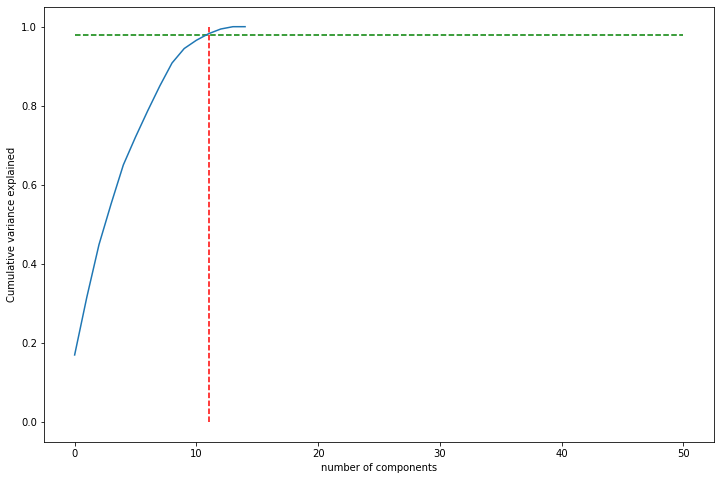

In [53]:
#Screeplot for the PCA components
fig = plt.figure(figsize=[12,8])
plt.vlines(x=11, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot( np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel("Cumulative variance explained")
plt.show()

In [54]:
#creating a dataframe for PCA on selected RFE columns
colnames = list(X_train_rfe.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],'Feature':colnames})

In [55]:
#creating a dataframe for PCA on selected RFE columns
colnames = list(X_test_rfe.columns)
pca_df1 = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'Feature':colnames})


In [56]:
#Creating a new df on 15 features for train data
X_train_pca = X_train_rfe[pca_df.Feature[:11]]
X_train_pca.head()

,num_hrefs,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_world,kw_max_min,kw_avg_min,kw_avg_avg,self_reference_avg_sharess,weekday_is_saturday,weekday_is_sunday,LDA_00
id,,,,,,,,,,,
4585,-0.379130,-0.461088,2.306102,-0.521588,-0.105763,-0.179169,-0.478858,-0.207771,-0.256467,-0.262960,0.649239
13413,-0.271029,-0.461088,2.306102,-0.521588,-0.417460,-0.706940,-1.126526,-0.442229,-0.256467,-0.262960,1.722221
9073,-0.703433,2.168784,-0.433632,-0.521588,-0.114275,-0.294236,1.251556,2.795348,-0.256467,-0.262960,-0.617823
28754,0.269477,2.168784,-0.433632,-0.521588,-0.340191,-0.510721,0.188679,-0.119032,-0.256467,-0.262960,1.180571
21620,-0.595332,-0.461088,-0.433632,1.917221,-0.018016,0.697696,-0.017370,-0.301180,-0.256467,3.802865,-0.124646


In [57]:
#Creating a new df on 15 features for train data
X_test_pca = X_test_rfe[pca_df1.Feature[:11]]
X_test_pca.head()

,num_hrefs,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_world,kw_max_min,kw_avg_min,kw_avg_avg,self_reference_avg_sharess,weekday_is_saturday,weekday_is_sunday,LDA_00
id,,,,,,,,,,,
17455,0.269477,-0.461088,-0.433632,-0.521588,-0.533364,-0.660100,-0.122936,0.226584,-0.256467,-0.26296,1.102832
25193,-0.379130,-0.461088,-0.433632,1.917221,-0.429902,-0.578539,-0.945489,-0.277828,-0.256467,-0.26296,-0.550436
13154,-0.162928,-0.461088,-0.433632,1.917221,-0.606705,-0.876031,-0.755866,-0.419927,-0.256467,-0.26296,-0.575752
6712,-0.703433,-0.461088,-0.433632,-0.521588,-0.016706,0.311528,-1.054648,-0.511352,-0.256467,-0.26296,0.386068
29548,-0.271029,-0.461088,2.306102,-0.521588,1.096499,1.472795,1.490399,0.252692,-0.256467,-0.26296,1.726284


In [58]:
# now doing final PCA with 11 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=11)
df_train_pca = pca_final.fit_transform(X_train_pca)
df_train_pca.shape

(20813, 11)

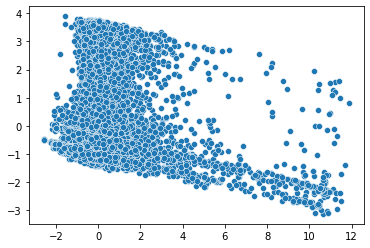

In [59]:
#Plotting first 2 PCA components
sns.scatterplot(x=df_train_pca[:,0], y=df_train_pca[:,1])
plt.show()

Applying the transformation on the test set

In [60]:
df_test_pca = pca_final.transform(X_test_pca)
df_test_pca.shape

(8920, 11)

# BASELINE MODELLING

## LINEAR REGRESSION

In [61]:
# created a function to get all the valuable metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [62]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(df_train_pca, Y_train)
# predict the testing pca data
train_predict = lm.predict(df_train_pca)
test_predict = lm.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train,train_predict)

print()
print("Test metrics")
regression_results(Y_test,test_predict)

Train metrics
explained_variance:  0.1146
r2:  0.1146
MAE:  0.656
MSE:  0.7783
RMSE:  0.8822

Test metrics
explained_variance:  0.1093
r2:  0.1091
MAE:  0.6417
MSE:  0.7505
RMSE:  0.8663


## Ridge Regression

In [63]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(df_train_pca, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [65]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(df_train_pca, Y_train)
print(ridge.coef_)

[ 0.09721399  0.00157308 -0.16520629 -0.13625306  0.03063026  0.0222007
 -0.07423487  0.08108636 -0.09349145  0.14035693 -0.1315047 ]


In [66]:
# predict it now...
train_predict = ridge.predict(df_train_pca)
test_predict = ridge.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train,train_predict)

print()
print("Test metrics")
regression_results(Y_test,test_predict)

Train metrics
explained_variance:  0.1146
r2:  0.1146
MAE:  0.656
MSE:  0.7783
RMSE:  0.8822

Test metrics
explained_variance:  0.1093
r2:  0.1091
MAE:  0.6417
MSE:  0.7505
RMSE:  0.8663


## Lasso Regression

In [67]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(df_train_pca, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [69]:
#Fitting Lasso model for alpha and printing coefficients which have been penalised

alpha =0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(df_train_pca, Y_train) 

Lasso(alpha=0.0001)

In [70]:
lasso.coef_

array([ 0.09716606,  0.00152164, -0.16513465, -0.13616614,  0.03053554,
        0.0221005 , -0.07412037,  0.0809544 , -0.09328899,  0.13991251,
       -0.13038641])

In [71]:
# predict it now...
train_predict = lasso.predict(df_train_pca)
test_predict = lasso.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train,train_predict)

print()
print("Test metrics")
regression_results(Y_test,test_predict)

Train metrics
explained_variance:  0.1146
r2:  0.1146
MAE:  0.656
MSE:  0.7783
RMSE:  0.8822

Test metrics
explained_variance:  0.1093
r2:  0.1091
MAE:  0.6417
MSE:  0.7504
RMSE:  0.8663


# Creating Submission File

In [72]:
# checking the unknown data
unseen.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,29733,http://mashable.com/2014/12/05/2014-cant-unsee/,10.0,564.0,0.505618,1.0,0.637394,21.0,1.0,0.0,3.0,4.723404,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,442.0,128.000000,23700.0,843300.0,340780.000000,2154.061235,3702.951220,2994.958581,2300.0,2300.0,2300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040069,0.839887,0.040038,0.040006,0.442277,0.053681,0.037234,0.019504,0.65625,0.343750,0.269218,0.062500,0.6,-0.263636,-0.700000,-0.10,1.0,0.0,0.5,0.0
1,29734,http://mashable.com/2014/01/02/twitter-new-yea...,12.0,1127.0,0.431298,1.0,0.621622,10.0,6.0,11.0,0.0,4.360248,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,733.0,254.875000,6300.0,843300.0,140325.000000,1671.078652,4040.166667,2704.175559,3500.0,6300.0,4900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025053,0.025040,0.025003,0.025000,0.899904,0.425115,0.159958,0.042591,0.014197,0.75000,0.250000,0.420924,0.033333,1.0,-0.243341,-0.714286,NaN,0.0,0.0,0.5,0.0
2,29735,http://mashable.com/2014/06/11/gopro-value-3-b...,10.0,400.0,0.564232,1.0,0.698795,1.0,0.0,1.0,1.0,4.765000,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,784.0,283.285714,6800.0,843300.0,166071.428571,1828.500000,3575.518291,2645.535689,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.885666,0.028572,0.028620,0.028572,0.548466,0.011693,0.047500,0.032500,0.59375,0.406250,0.312286,0.136364,0.5,-0.354808,-0.800000,-0.15,0.0,0.0,0.5,0.0
3,29736,http://mashable.com/2014/10/08/spanish-ebola-d...,12.0,798.0,0.435279,1.0,0.613054,2.0,2.0,3.0,1.0,3.984962,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,796.0,284.222222,1800.0,843300.0,325322.222222,1059.333333,7735.494465,3966.507513,6300.0,6300.0,6300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022223,0.495422,0.022223,0.437909,0.022223,0.537687,0.028463,0.047619,0.033835,NaN,0.415385,0.359650,0.136364,1.0,-0.362912,-1.000000,-0.05,0.0,0.0,0.5,0.0
4,29737,http://mashable.com/2014/02/09/jennifer-lawren...,11.0,1010.0,0.464503,1.0,0.611727,32.0,2.0,1.0,0.0,5.180198,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,269.0,91.714286,0.0,843300.0,214137.500000,0.000000,3583.632001,2030.692327,1500.0,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.025536,0.025047,0.899314,0.025101,0.025002,0.412513,0.104127,0.025743,0.013861,0.65000,0.350000,0.375991,0.100000,0.8,-0.264286,-0.500000,NaN,0.0,0.0,0.5,0.0


### Data Cleaning

In [73]:
# We will be dropping the columns which won't come handy in our further analysis...
unseen.drop(['url','average_token_length','n_tokens_title',
                'n_tokens_content','n_unique_tokens','n_non_stop_words',
                'n_non_stop_unique_tokens','is_weekend'],1,inplace=True)

### Missing Values

In [74]:
# getting missing %
round(unseen.isnull().mean()*100,2)

id                                0.00
num_hrefs                         2.76
num_self_hrefs                   16.17
num_imgs                         18.75
num_videos                        2.14
num_keywords                      1.70
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.60
kw_max_min                        1.37
kw_avg_min                        0.27
kw_min_max                        0.32
kw_max_max                        5.09
kw_avg_max                        0.34
kw_min_avg                        1.08
kw_max_avg                        2.27
kw_avg_avg                        2.95
self_reference_min_shares         1.07
self_reference_max_shares         5.33
self_reference_avg_sharess        1.03
weekday_is_monday                 3.27
weekday_is_tuesday       

In [75]:
# Before interpolating we will be converting missing values in binary columns into 0
unseen['weekday_is_monday']= unseen['weekday_is_monday'].fillna(0)
unseen['weekday_is_tuesday']= unseen['weekday_is_tuesday'].fillna(0)
unseen['weekday_is_wednesday']= unseen['weekday_is_wednesday'].fillna(0)
unseen['weekday_is_thursday']= unseen['weekday_is_thursday'].fillna(0)
unseen['weekday_is_friday']= unseen['weekday_is_friday'].fillna(0)
unseen['weekday_is_saturday']= unseen['weekday_is_saturday'].fillna(0)
unseen['weekday_is_sunday']= unseen['weekday_is_sunday'].fillna(0)

In [76]:
# interpolating all the missing value columns
unseen.interpolate(method = 'linear', direction = 'forward', inplace = True)

In [77]:
# Re-checking the Missing Values...
unseen.isnull().sum()

id                               0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_sharess       0
weekday_is_monday                0
weekday_is_tuesday               0
weekday_is_wednesday             0
weekday_is_thursday              0
weekday_is_friday   

### Handling Outliers

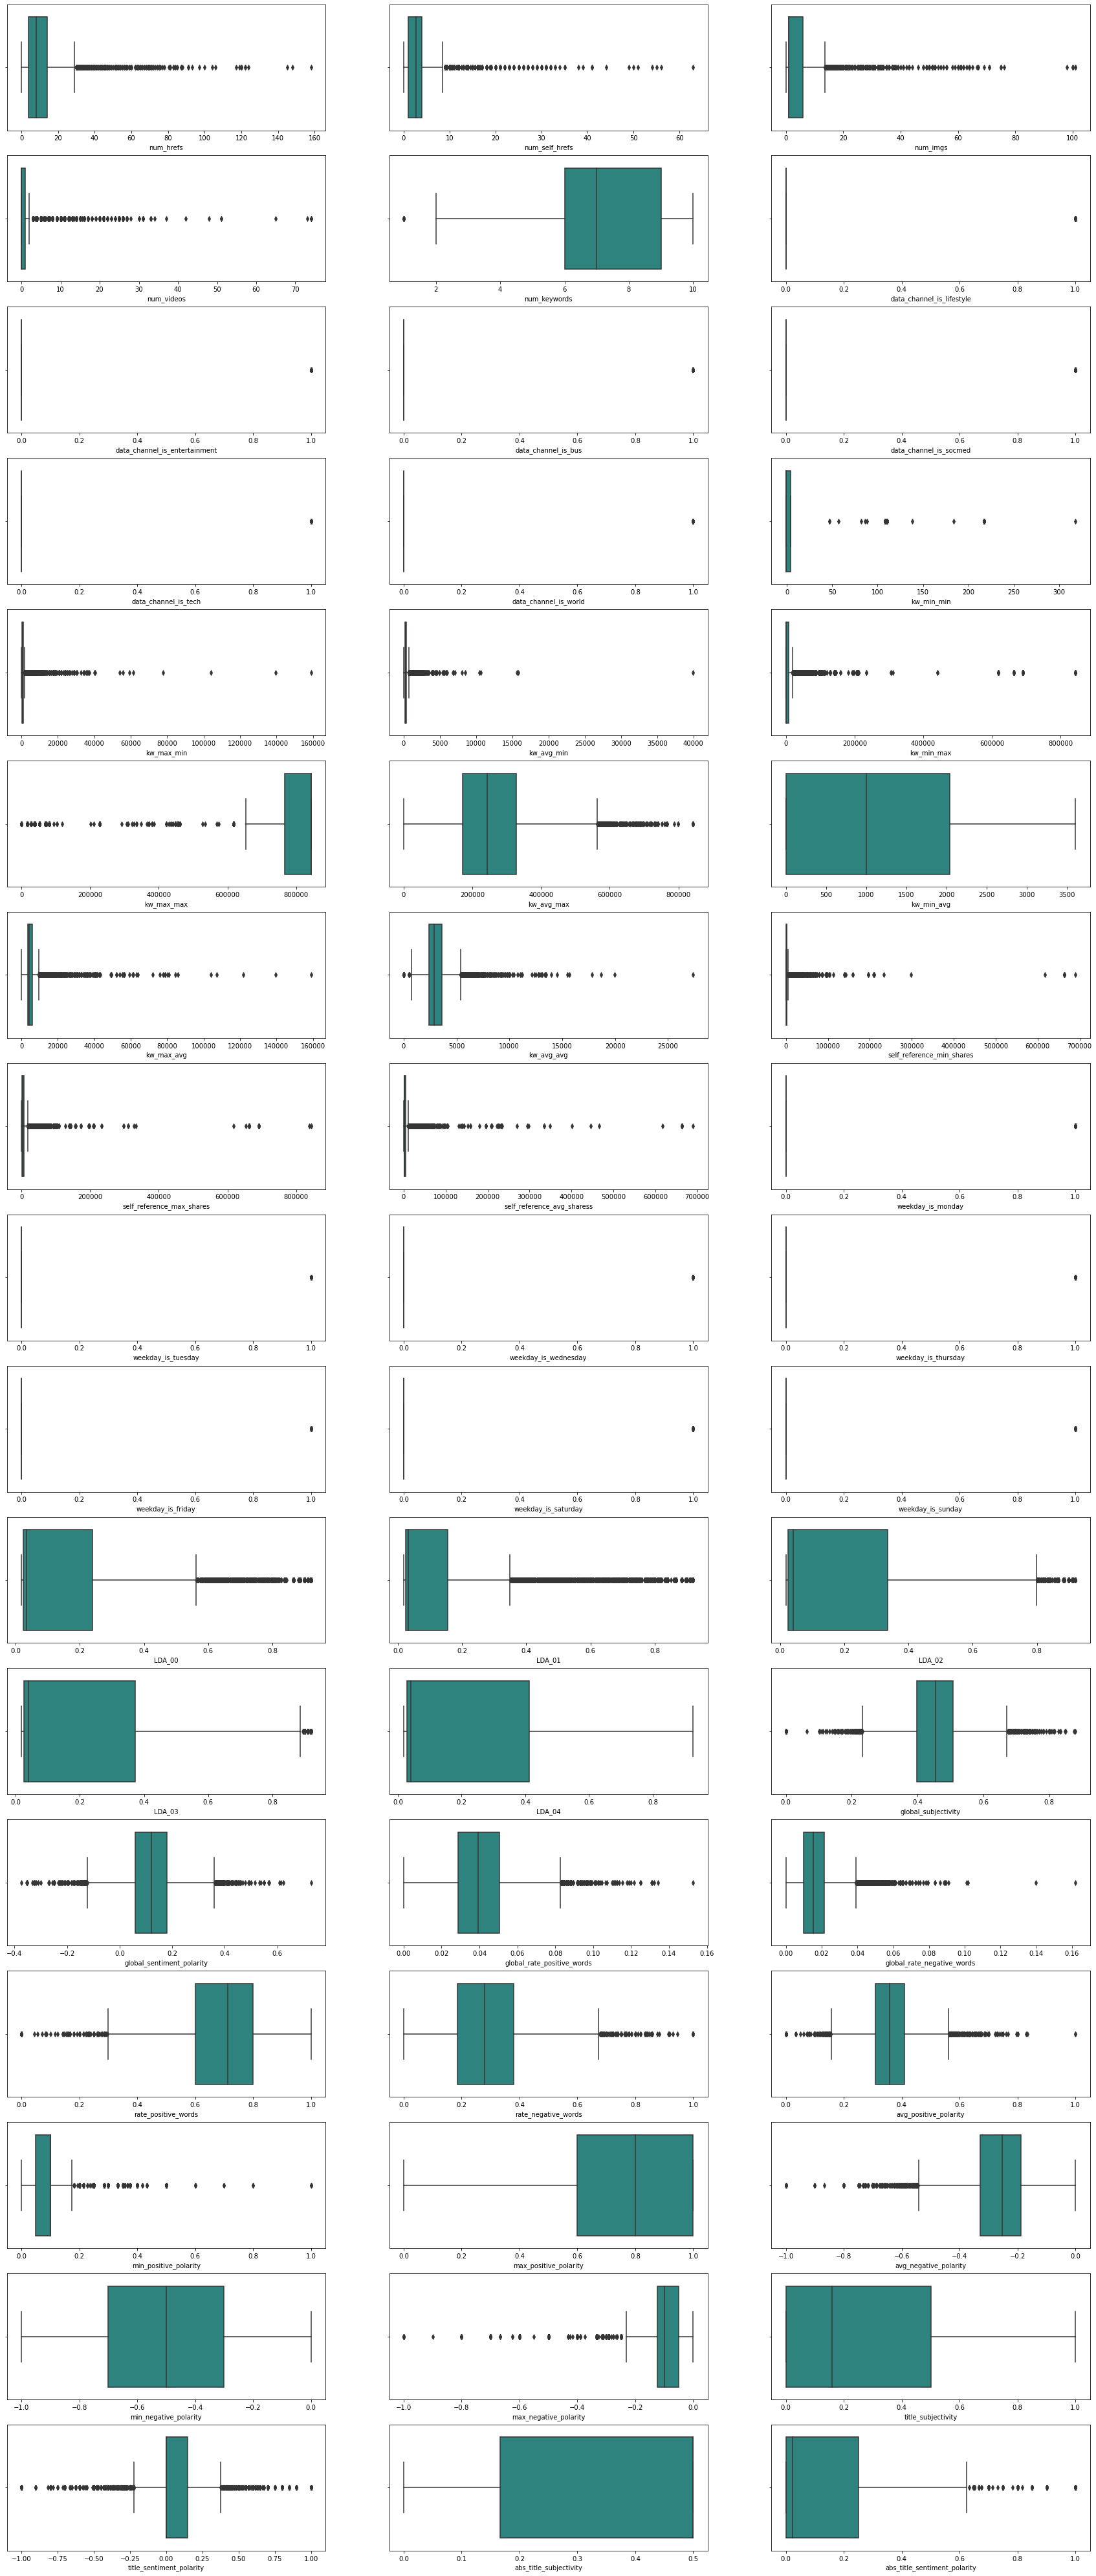

In [78]:
# Making box plot for the data
plt.figure(figsize = (30,180))
feature = unseen.columns[1:]
for i in enumerate(feature):
    plt.subplot(42,3, i[0]+1)
    sns.boxplot(unseen[i[1]],palette='viridis')

So from the above plot we can see that outliers are handled and our data looks continuous now

### Dimentionality reduction using PCA

In [79]:
pca = PCA(random_state=42)

In [80]:
pca.fit(unseen)

PCA(random_state=42)

In [81]:
# cumulative variance calculation
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [82]:
submission_data = unseen[X_train.columns]
submission_data.shape

(9911, 50)

In [83]:
unseen.head()

,id,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,29733,21.0,1.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,442.0,128.000000,23700.0,843300.0,340780.000000,2154.061235,3702.951220,2994.958581,2300.0,2300.0,2300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040069,0.839887,0.040038,0.040006,0.442277,0.053681,0.037234,0.019504,0.656250,0.343750,0.269218,0.062500,0.6,-0.263636,-0.700000,-0.100,1.0,0.0,0.5,0.0
1,29734,10.0,6.0,11.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,733.0,254.875000,6300.0,843300.0,140325.000000,1671.078652,4040.166667,2704.175559,3500.0,6300.0,4900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025053,0.025040,0.025003,0.025000,0.899904,0.425115,0.159958,0.042591,0.014197,0.750000,0.250000,0.420924,0.033333,1.0,-0.243341,-0.714286,-0.125,0.0,0.0,0.5,0.0
2,29735,1.0,0.0,1.0,1.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,784.0,283.285714,6800.0,843300.0,166071.428571,1828.500000,3575.518291,2645.535689,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.028572,0.885666,0.028572,0.028620,0.028572,0.548466,0.011693,0.047500,0.032500,0.593750,0.406250,0.312286,0.136364,0.5,-0.354808,-0.800000,-0.150,0.0,0.0,0.5,0.0
3,29736,2.0,2.0,3.0,1.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,796.0,284.222222,1800.0,843300.0,325322.222222,1059.333333,7735.494465,3966.507513,6300.0,6300.0,6300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.022223,0.495422,0.022223,0.437909,0.022223,0.537687,0.028463,0.047619,0.033835,0.621875,0.415385,0.359650,0.136364,1.0,-0.362912,-1.000000,-0.050,0.0,0.0,0.5,0.0
4,29737,32.0,2.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,269.0,91.714286,0.0,843300.0,214137.500000,0.000000,3583.632001,2030.692327,1500.0,3700.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.025536,0.025047,0.899314,0.025101,0.025002,0.412513,0.104127,0.025743,0.013861,0.650000,0.350000,0.375991,0.100000,0.8,-0.264286,-0.500000,-0.075,0.0,0.0,0.5,0.0


In [84]:
submission_data = unseen.set_index('id')[X_train_pca.columns]
submission_data.shape

(9911, 11)

In [85]:
# We ll go for Ridge regression as it has the lowest RMSE
unseen["Shares"] = ridge.predict(submission_data)
output = unseen[['id','Shares']]
output.head()

,id,Shares
0,29733,-10.066418
1,29734,233.143348
2,29735,-158.507639
3,29736,254.760676
4,29737,-8.246318


In [86]:
output.to_csv('submission.csv',index=False)